<a href="https://colab.research.google.com/github/vijaykumarharakuni/mllearning/blob/main/Ensemble_Learning_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('libraries imported')

libraries imported


In [8]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv"
data=pd.read_csv(url)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
# Check min while doing the data cleaning
data.min()

,0
Pregnancies,0.000
Glucose,0.000
BloodPressure,0.000
SkinThickness,0.000
Insulin,0.000
BMI,0.000
DiabetesPedigreeFunction,0.078
Age,21.000
Outcome,0.000


In [11]:
print((data==0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [12]:
col_with_zero=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [13]:
for col in col_with_zero:
    median_value=data[col].median()
    data[col]=data[col].replace(0,median_value)

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#Know the distribution of outcome
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<Axes: xlabel='Outcome'>

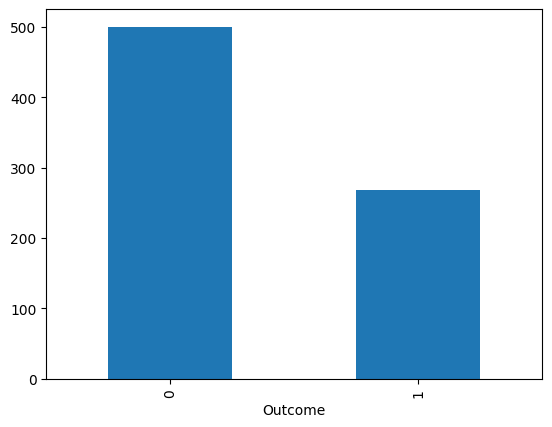

In [15]:
data['Outcome'].value_counts().plot(kind='bar')

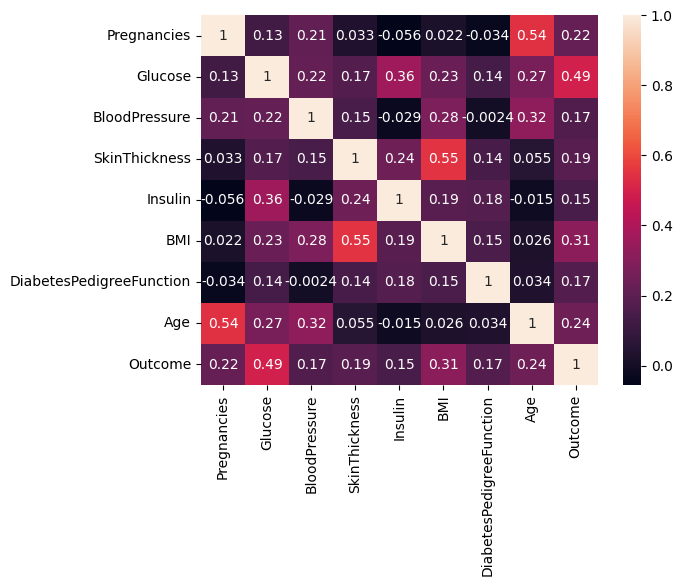

In [16]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [16]:
from re import X
# Create indep var and dep var
X=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#Bagging

Bagging Classifier

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
est=DecisionTreeClassifier(max_depth=3) #Change the max _lenght to handel the overfitting
bc=BaggingClassifier

In [34]:
#num_trees=100
bagging_cls=BaggingClassifier(estimator=est,n_estimators=100,random_state=42,oob_score=True)
bagging_cls.fit(X_train,y_train)
print('Training completed')

Training completed


In [35]:
#Crete the prediction
y_pred=bagging_cls.predict(X_test)
y_pred_train=bagging_cls.predict(X_train)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Test Accurancy')
print(accuracy_score(y_test,y_pred))
print('Train Accurancy')
print(accuracy_score(y_train,y_pred_train))

Test Accurancy
0.7532467532467533
Train Accurancy
0.8044692737430168


In [43]:
#Use of Single Decision tree
decision_tree=DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train,y_train)
y_pred_dt=decision_tree.predict(X_test)
y_pred_train_dt=decision_tree.predict(X_train)
print('Test Accurancy')
print(accuracy_score(y_test,y_pred_dt))
print('Train Accurancy')
print(accuracy_score(y_train,y_pred_train))


Test Accurancy
0.7186147186147186
Train Accurancy
0.8044692737430168


In [44]:
#Base est to logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [45]:
bagging_cls=BaggingClassifier(estimator=lr,n_estimators=100,random_state=42,oob_score=True)
bagging_cls.fit(X_train,y_train)
print('Training completed')

y_pred=bagging_cls.predict(X_test)
y_pred_train=bagging_cls.predict(X_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Test Accurancy')
print(accuracy_score(y_test,y_pred))
print('Train Accurancy')
print(accuracy_score(y_train,y_pred_train))

Training completed
Test Accurancy
0.7445887445887446
Train Accurancy
0.7802607076350093


In [48]:
#Print oob score - score near to 1 better the model
print(bagging_cls.oob_score_)

0.7653631284916201


Implement the random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=3,random_state=42)
rf.fit(X_train,y_train)
print('Training completed')

Training completed


In [56]:
y_pred=rf.predict(X_test)
y_pred_train=rf.predict(X_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Test Accurancy')
print(accuracy_score(y_test,y_pred))
print('Train Accurancy')
print(accuracy_score(y_train,y_pred_train))

Test Accurancy
0.7532467532467533
Train Accurancy
0.8063314711359404


In [60]:
# Perform hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [1,2,3,5],
    'max_features': ['auto','sqrt'],
    'min_samples_split': [2,4],
    'min_samples_leaf': [1,2],
    'bootstrap': [True,False]

}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search.best_params_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Calculate and print accuracy
print('Accuracy score (test): ', accuracy_score(y_test, y_pred_test))
print('Accuracy score (train): ', accuracy_score(y_train, y_pred_train))

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Best parameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Accuracy score (test):  0.7402597402597403
Accuracy score (train):  0.8584729981378026


In [61]:
best_model.feature_importances_

array([0.06201771, 0.36656194, 0.05032766, 0.05672246, 0.06521241,
       0.15186757, 0.0756786 , 0.17161165])

In [62]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

 boosting
Combine various weak learners/estimators/models to form a strong learner
train models sequentially

1. Weak Learner--shallow decision trees(stumps),with depth only 1, better than random guess.
2. Sequential learning-iterative process ensures that ensemble gradually improving.
3. weights-misclassified samples assigned higher weights.
4. Final Pred-Combine the pred from all weak learners, weighted sum.

In [ ]:
#Adaboost - Adaptive boosting
#Step 1- Intitally assign equal weights to all observation to dataset
#Step 2-

  to  Everyone
Adaboost--
AdaBoost, an abbreviation for adaptive boosting, stands as one of the leading boosting algorithms with widespread adoption. It focuses on classification problems, aiming to transform a collection of weak classifiers into a single strong classifier. It increases the weights of misclassified instances, directing subsequent classifiers to pay more attention to challenging cases. The AdaBoost algorithm follows these steps:
Initially, the algorithm assigns equal weights to all observations in the dataset.
A model is constructed using a subset of the data.
Predictions are made on the entire dataset using this model.
The algorithm computes errors by comparing these predictions to the actual values.
In the subsequent model creation, the algorithm assigns higher weights to incorrectly predicted data points.
Weights are determined based on error values, where higher errors result in heavier observation weights.
This iterative process continues until the error function stabilizes or the algorithm reaches the maximum limit of estimators.





In [74]:
#import adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_boost=AdaBoostClassifier(n_estimators=100,random_state=42)

In [78]:
ada_boost.fit(X_train,y_train)
y_pred=ada_boost.predict(X_test)
y_pred_train=ada_boost.predict(X_train)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Test Accurancy')
print(accuracy_score(y_test,y_pred))
print('Train Accurancy')
print(accuracy_score(y_train,y_pred_train))

Test Accurancy
0.7662337662337663
Train Accurancy
0.8156424581005587


Hyperparameter tuning for adaboost

In [80]:
# Perform hyper parameter tuning for adaboost
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.5,0.8,1],
    'algorithm': ['SAMME', 'SAMME.R']

}

ada_boost = AdaBoostClassifier()
grid_search = GridSearchCV(ada_boost, param_grid, cv=10, scoring='accuracy', verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search.best_params_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Calculate and print accuracy
print('Accuracy score (test): ', accuracy_score(y_test, y_pred_test))
print('Accuracy score (train): ', accuracy_score(y_train, y_pred_train))

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best parameters:  {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}
Accuracy score (test):  0.7575757575757576
Accuracy score (train):  0.7914338919925512


In [81]:
best_model.feature_importances_

array([0.        , 0.5185422 , 0.        , 0.        , 0.        ,
       0.32979754, 0.03039295, 0.12126731])

In [82]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [1]:
#Gradient Boosting

#Gradient Boosting

- Regression and Classification
- Strong Predictive model by combine weak leaners
-Key Idea - min errors step by step from residual error of previous model
-Goal -- Student 90 marks from 100
-Test 1                      Test 2
 70 = 90-70 =20 error        80 =90-80=10 min error

-----
Gradient Boosting is a machine learning technique used for regression and classification tasks. It is an ensemble learning method that builds a strong model by combining the predictions of many weak learners, typically decision trees.
The strength of Gradient Boosting lies in its ability to iteratively improve the model by learning from the errors (residuals) made by the previous models.
Unlike traditional boosting methods that use the same model type for each iteration, Gradient Boosting builds each new model by fitting it to the residual errors of the combined previous models. This allows the model to improve its predictions progressively.
How Gradient Boosting Works (Step-by-Step)
1.	Initialization:
o	The process starts by making a basic initial prediction, often the mean (for regression) or log-odds (for classification) of the target variable. This serves as the base prediction.
2.	Calculate the Residuals (Errors):

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb_cls=GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=2)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
from re import X
# Create indep var and dep var
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
gb_cls.fit(X_train,y_train)
y_pred=gb_cls.predict(X_test)
y_pred_train=gb_cls.predict(X_train)
#

In [29]:
# create pred
y_pred=gb_cls.predict(X_test)
y_pred_train=gb_cls.predict(X_train)
from sklearn.metrics import accuracy_score,classification_report
print('Test Accuracy',accuracy_score(y_test,y_pred))
print('Train Accuracy',accuracy_score(y_train,y_pred_train))

Test Accuracy 0.7445887445887446
Train Accuracy 0.8901303538175046


XGBOOST

In [30]:
!pip install xgboost

In [34]:
from xgboost import XGBClassifier
#xgb_cls=XGBClassifier(n_estimators=200,learning_rate=0.05,max_depth=2)
xgb_cls=XGBClassifier()

In [35]:
xgb_cls.fit(X_train,y_train)
y_pred=xgb_cls.predict(X_test)
y_pred_train=xgb_cls.predict(X_train)

In [36]:
from sklearn.metrics import accuracy_score,classification_report
print('Test Accuracy',accuracy_score(y_test,y_pred))
print('Train Accuracy',accuracy_score(y_train,y_pred_train))

Test Accuracy 0.7272727272727273
Train Accuracy 1.0


In [37]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100,             # Number of boosting rounds
    learning_rate=0.1,            # Step size shrinking
    max_depth=3,                  # Maximum depth of trees
    subsample=0.8,                # Fraction of data used for each tree
    colsample_bytree=0.8,         # Fraction of features used for each tree
    gamma=0.1,                    # Minimum loss reduction to make a further partition
    reg_lambda=1,                 # L2 regularization
    reg_alpha=0,                  # L1 regularization
    random_state=42 )              # For reproducibility
xgb.fit(X_train,y_train)
print('Training completed')
# create pred
y_pred=xgb.predict(X_test)
y_pred_train=xgb.predict(X_train)
from sklearn.metrics import accuracy_score,classification_report
print('Test Accuracy',accuracy_score(y_test,y_pred))
print('Train Accuracy',accuracy_score(y_train,y_pred_train))

Training completed
Test Accuracy 0.7402597402597403
Train Accuracy 0.925512104283054


In [38]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=250,             # Number of boosting rounds
    learning_rate=0.03,            # Step size shrinking
    max_depth=3,                  # Maximum depth of trees
    subsample=0.8,                # Fraction of data used for each tree
    colsample_bytree=0.8,         # Fraction of features used for each tree
    gamma=0.1,                    # Minimum loss reduction to make a further partition
    reg_lambda=1,                 # L2 regularization
    reg_alpha=0,                  # L1 regularization
    random_state=42,eval_metric='logloss' )              # For reproducibility
xgb.fit(X_train,y_train)
print('Training completed')
# create pred
y_pred=xgb.predict(X_test)
y_pred_train=xgb.predict(X_train)
from sklearn.metrics import accuracy_score,classification_report
print('Test Accuracy',accuracy_score(y_test,y_pred))
print('Train Accuracy',accuracy_score(y_train,y_pred_train))

Training completed
Test Accuracy 0.7359307359307359
Train Accuracy 0.8975791433891993


CATBOOST